<a href="https://colab.research.google.com/github/victoriousvictor42/electic-car/blob/master/Autolib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


This is a hypothesis testing that is being conducted for Autolib electric car-sharing service company.
We are investigating a claim about blue cars from the Autolib dataset.


In [0]:
# importing libraries that we will be working with
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

reading the data we have

In [0]:
df = pd.read_csv('http://bit.ly/DSCoreAutolibDataset')
df2 = pd.read_excel('columns_explanation (1).xlsx')

getiing information about our dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
Postal code               16085 non-null int64
date                      16085 non-null object
n_daily_data_points       16085 non-null int64
dayOfWeek                 16085 non-null int64
day_type                  16085 non-null object
BlueCars_taken_sum        16085 non-null int64
BlueCars_returned_sum     16085 non-null int64
Utilib_taken_sum          16085 non-null int64
Utilib_returned_sum       16085 non-null int64
Utilib_14_taken_sum       16085 non-null int64
Utilib_14_returned_sum    16085 non-null int64
Slots_freed_sum           16085 non-null int64
Slots_taken_sum           16085 non-null int64
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [4]:
df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [5]:
df.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [6]:
df.shape

(16085, 13)

In [7]:
# standardizing the columns names to
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df.columns

Index(['postal_code', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

Sampling the data set using systematic random sampling


In [8]:
sample = df.sample(n=1500)
sample

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
1760,75012,2/14/2018,1440,2,weekday,448,464,9,8,41,37,145,149
11533,93350,2/12/2018,1440,0,weekday,16,15,0,0,1,0,2,3
14309,94220,4/9/2018,1440,0,weekday,44,42,0,0,0,0,0,0
7084,92270,3/12/2018,1440,0,weekday,29,28,0,0,1,2,0,0
7479,92300,6/14/2018,1439,3,weekday,191,195,5,5,32,30,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16001,95880,3/17/2018,1440,5,weekend,34,32,1,0,0,1,0,0
9411,92500,3/13/2018,1440,1,weekday,126,124,4,3,16,9,0,0
1888,75013,1/17/2018,1440,2,weekday,557,549,12,9,42,37,157,155
15707,95100,4/4/2018,1440,2,weekday,18,24,0,1,2,1,0,0


checking for anomalies in the sample 

In [9]:
# checking for missing values
sample.isnull().any().any()

False



> there are no existing missing values



In [10]:
# checking for duplicates
sample.duplicated().any()

False



> there ain't any duplicates in the dataset



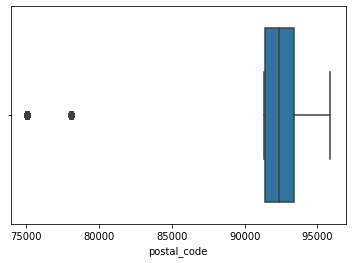

In [11]:
#checking for outliers
sns.boxplot(sample['postal_code'])
plt.show()

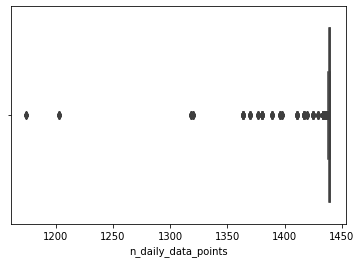

In [12]:
sns.boxplot(sample['n_daily_data_points'])
plt.show()

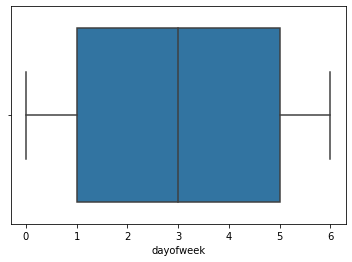

In [13]:
sns.boxplot(sample['dayofweek'])
plt.show()

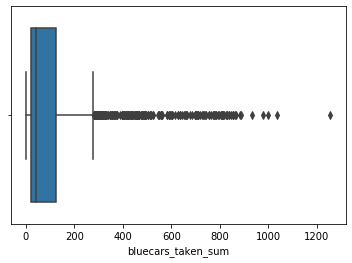

In [14]:
sns.boxplot(sample['bluecars_taken_sum'])
plt.show()

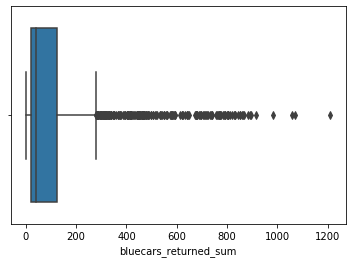

In [15]:
sns.boxplot(sample['bluecars_returned_sum'])
plt.show()

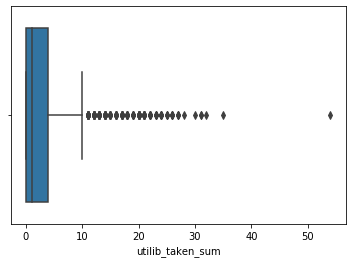

In [16]:
sns.boxplot(sample['utilib_taken_sum'])
plt.show()

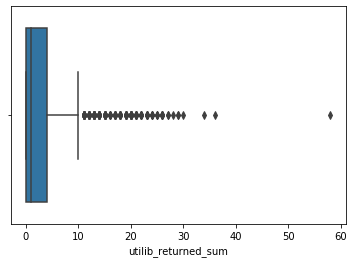

In [17]:
sns.boxplot(sample['utilib_returned_sum'])
plt.show()

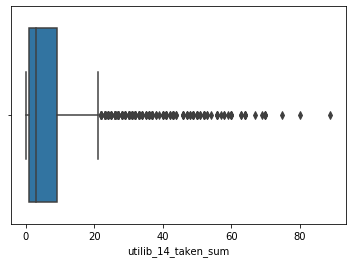

In [18]:
sns.boxplot(sample['utilib_14_taken_sum'])
plt.show()

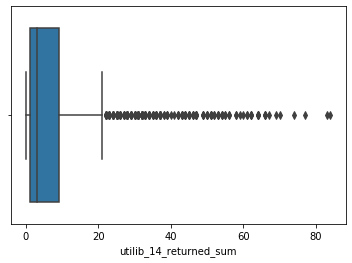

In [19]:
sns.boxplot(sample['utilib_14_returned_sum'])
plt.show()

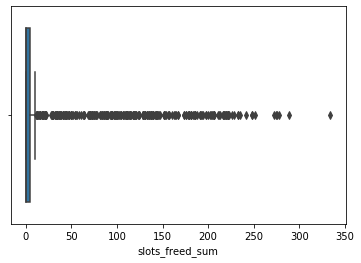

In [20]:
sns.boxplot(sample['slots_freed_sum'])
plt.show()

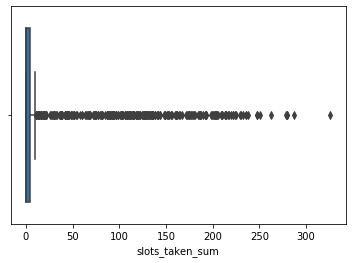

In [21]:
sns.boxplot(sample['slots_taken_sum'])
plt.show()

In [0]:
# labeling data on the categorical data so that we can check for outliers
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
sample['date'] = label.fit_transform(sample['date'])
sample['day_type'] = label.fit_transform(sample['day_type'])

In [23]:
# checking whether labelling has been applied to our dataset
print(df.date.unique())
print(df.day_type.unique())

['1/1/2018' '1/2/2018' '1/3/2018' '1/4/2018' '1/5/2018' '1/6/2018'
 '1/7/2018' '1/8/2018' '1/9/2018' '1/10/2018' '1/11/2018' '1/12/2018'
 '1/13/2018' '1/14/2018' '1/15/2018' '1/16/2018' '1/17/2018' '1/18/2018'
 '1/19/2018' '1/20/2018' '1/21/2018' '1/22/2018' '1/23/2018' '1/24/2018'
 '1/25/2018' '1/26/2018' '1/27/2018' '1/28/2018' '1/29/2018' '1/30/2018'
 '1/31/2018' '2/1/2018' '2/2/2018' '2/3/2018' '2/4/2018' '2/5/2018'
 '2/6/2018' '2/7/2018' '2/8/2018' '2/9/2018' '2/10/2018' '2/11/2018'
 '2/12/2018' '2/13/2018' '2/14/2018' '2/15/2018' '2/16/2018' '2/17/2018'
 '2/18/2018' '2/19/2018' '2/20/2018' '2/21/2018' '2/22/2018' '2/23/2018'
 '2/24/2018' '2/28/2018' '3/1/2018' '3/2/2018' '3/3/2018' '3/4/2018'
 '3/5/2018' '3/6/2018' '3/7/2018' '3/8/2018' '3/9/2018' '3/10/2018'
 '3/11/2018' '3/12/2018' '3/13/2018' '3/14/2018' '3/15/2018' '3/16/2018'
 '3/17/2018' '3/18/2018' '3/19/2018' '3/20/2018' '3/21/2018' '3/22/2018'
 '3/23/2018' '3/24/2018' '3/25/2018' '3/26/2018' '3/27/2018' '3/28/2018'
 '3/2

In [24]:
sample.columns

Index(['postal_code', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

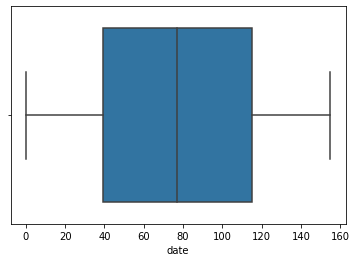

In [25]:
sns.boxplot(sample['date'])
plt.show()

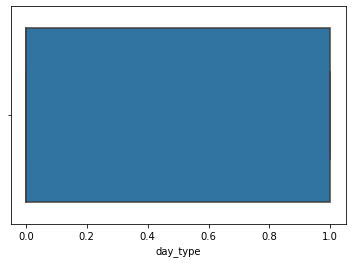

In [26]:
sns.boxplot(sample['day_type'])
plt.show()



> we confrim that there are outliers in the following columns

*   postal code
*   number of daily data points
*   bluecars taken sum
*   bluecars returned sum
*   utilib taken sum
*   utilib returned sum
*   utilib 14 taken sum
*   utilib 14 returned sum
*   slots freed sum
*   slots taken item














**Dealing with anomalies**



> removing the outliers in the dataset using z-score



In [27]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(sample))
print(z)

[[1.84884871 0.91820553 0.27420583 ... 2.16231782 2.31391086 2.39039761]
 [0.58066882 0.96276779 0.27420583 ... 0.63639111 0.37846378 0.36056445]
 [0.69593113 0.86428518 0.27420583 ... 0.63639111 0.41611937 0.41709107]
 ...
 [1.84871622 1.54207727 0.27420583 ... 2.16231782 2.53984439 2.50345085]
 [0.8125183  0.75287951 0.27420583 ... 0.56075033 0.41611937 0.41709107]
 [0.48130476 1.47523387 0.2016774  ... 0.04437593 0.41611937 0.41709107]]


In [28]:
threshold = 3
print(np.where(z > 3))

(array([  13,   13,   13,   13,   13,   13,   16,   16,   16,   16,   16,
         16,   16,   28,   28,   28,   28,   28,   28,   28,   54,   54,
         58,   58,   58,   58,   89,   89,   89,   89,   89,   89,  122,
        138,  141,  141,  141,  141,  149,  149,  149,  149,  149,  149,
        150,  165,  165,  199,  199,  199,  199,  200,  200,  200,  200,
        200,  200,  200,  200,  210,  210,  210,  210,  214,  230,  232,
        241,  249,  249,  249,  249,  249,  253,  253,  253,  253,  253,
        253,  255,  262,  262,  276,  276,  304,  336,  336,  356,  356,
        356,  356,  365,  365,  387,  387,  387,  387,  387,  387,  387,
        387,  387,  397,  397,  397,  397,  397,  467,  467,  467,  467,
        467,  467,  486,  486,  486,  486,  486,  486,  486,  487,  505,
        506,  506,  506,  530,  530,  530,  530,  530,  530,  530,  563,
        563,  563,  563,  564,  565,  565,  624,  624,  624,  624,  624,
        624,  624,  624,  630,  630,  630,  630,  

In [29]:
sample1 = sample[(z < 3).all(axis=1)]
print(sample.shape)
print(sample1.shape)

(1500, 13)
(1395, 13)




> As you can see, the outliers have been removed. The rows have been reduced from 1500 to 1395.

